<a href="https://colab.research.google.com/github/aniket-pandey-ji/Calendar-Outlook-/blob/main/Diabetes_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
from sklearn.datasets import load_diabetes

# Load dataset
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target  # Add target variable (disease progression)

# Preview
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


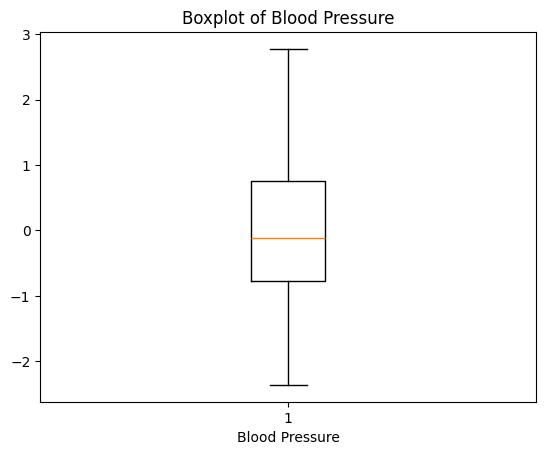

In [18]:
# prompt: Using dataframe df: bp

import matplotlib.pyplot as plt

# Create the boxplot
plt.boxplot(df['bp'])

# Add labels and title
plt.xlabel('Blood Pressure')
plt.title('Boxplot of Blood Pressure')

# Show the plot
plt.show()


In [7]:
df.describe()  # Notice different ranges (e.g., glucose vs. blood pressure)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [8]:
from sklearn.preprocessing import StandardScaler

# Select features to normalize (e.g., glucose 's1', BMI 'bmi')
features_to_scale = ['s1', 'bmi', 'bp', 's6']
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Verify
df[features_to_scale].describe()  # Mean ≈0, Std ≈1

,s1,bmi,bp,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,8.037814e-18,2.009453e-17,-1.607563e-17,-4.018907e-17
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00
min,-2.665411e+00,-1.897929e+00,-2.363050e+00,-2.896390e+00
25%,-7.200196e-01,-7.196249e-01,-7.706500e-01,-6.975491e-01
50%,-9.084100e-02,-1.531324e-01,-1.192138e-01,-2.265729e-02
75%,5.961931e-01,6.569519e-01,7.493678e-01,5.869224e-01
max,3.235851e+00,3.585718e+00,2.776058e+00,2.851075e+00


In [9]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
df[features_to_scale] = mm_scaler.fit_transform(df[features_to_scale])

# Verify
df[features_to_scale].describe()  # Min=0, Max=1

,s1,bmi,bp,s6
count,442.000000,442.000000,442.000000,442.000000
mean,0.451668,0.346107,0.459817,0.503942
std,0.169647,0.182567,0.194807,0.174187
min,0.000000,0.000000,0.000000,0.000000
25%,0.329657,0.214876,0.309859,0.382576
50%,0.436275,0.318182,0.436620,0.500000
75%,0.552696,0.465909,0.605634,0.606061
max,1.000000,1.000000,1.000000,1.000000


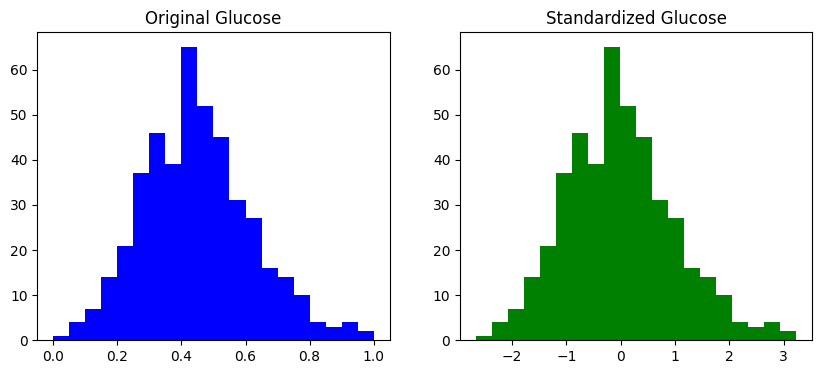

In [10]:
import matplotlib.pyplot as plt

# Before normalization
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Original Glucose")
plt.hist(df['s1'], bins=20, color='blue')

# After normalization
plt.subplot(1, 2, 2)
plt.title("Standardized Glucose")
plt.hist(scaler.fit_transform(df[['s1']]), bins=20, color='green')
plt.show()

In [12]:
# 1. Load Data (with proper normalization)
from sklearn.datasets import load_diabetes
import pandas as pd
from sklearn.preprocessing import StandardScaler

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# 2. Normalize Key Features
scaler = StandardScaler()
features_to_normalize = ['bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

# 3. Train/Test Split (corrected syntax)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop('target', axis=1)
y = df['target']  # Fixed from y = df.target()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Model Training
model = LinearRegression()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(f"Model R² Score: {score:.4f}")  # Proper formatting

Model R² Score: 0.4526


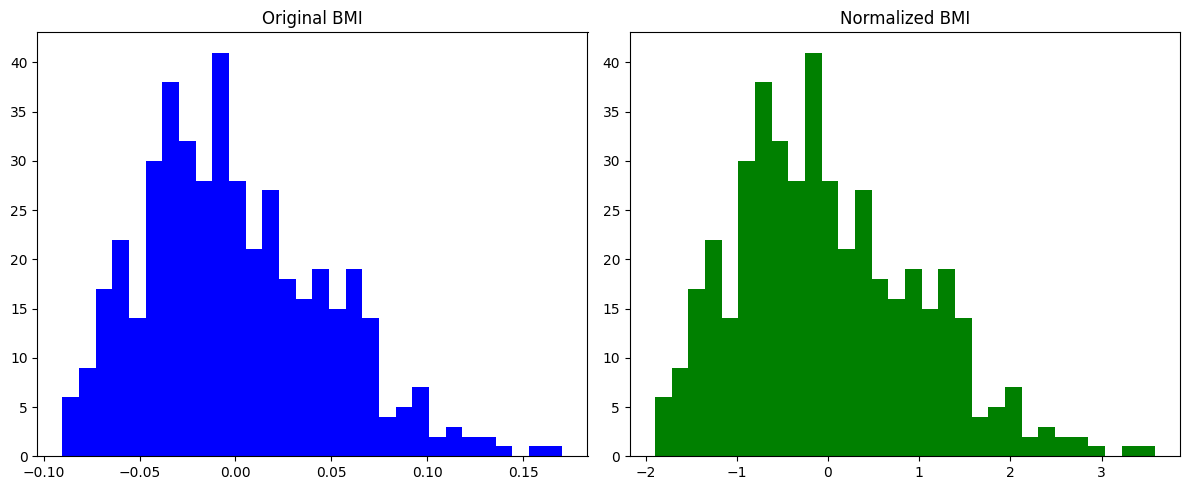

In [17]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes

# Load data
diabetes = load_diabetes()
bmi_original = diabetes.data[:, 2]  # Original BMI values (3rd column)

# Normalize BMI
scaler = StandardScaler()
bmi_normalized = scaler.fit_transform(bmi_original.reshape(-1, 1))

# Create subplots
plt.figure(figsize=(12, 5))

# Before normalization
plt.subplot(1, 2, 1)
plt.hist(bmi_original, bins=30, color='blue')
plt.title("Original BMI")

# After normalization
plt.subplot(1, 2, 2)
plt.hist(bmi_normalized, bins=30, color='green')
plt.title("Normalized BMI")

plt.tight_layout()
plt.show()